In [5]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(tidyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(umap)))
# Load necessary packages
suppressWarnings(suppressPackageStartupMessages(library(factoextra)))


In [6]:
# set path to the data
file_path <- file.path("..","..","data", "5.converted_data","normalized_feature_selected_output.parquet")

# read the data
df <- arrow::read_parquet(file_path)
df$Metadata_genotype <- gsub("wt", "Wild Type", df$Metadata_genotype)
df$Metadata_genotype <- gsub("unsel", "Mid-Severity", df$Metadata_genotype)
df$Metadata_genotype <- gsub("high", "High-Severity", df$Metadata_genotype)
df$Metadata_genotype <- factor(
    df$Metadata_genotype, 
    levels = c("Wild Type", "Mid-Severity", "High-Severity")
)
df$Metadata_identity <- gsub("both", "Merged", df$Metadata_identity)
df$Metadata_identity <- gsub("br", "Br", df$Metadata_identity)
df$Metadata_identity <- gsub("op", "Op", df$Metadata_identity)
df$Metadata_identity <- factor(
    df$Metadata_identity, 
    levels = c("Br","Op", "Merged")
)
head(df)

Metadata_Image_FileName_OP,Metadata_ObjectNumber,Metadata_Object_ConvertImageToObjects_Number_Object_Number,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxArea,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMaximum_Y,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_X,Metadata_Object_ConvertImageToObjects_AreaShape_BoundingBoxMinimum_Y,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_X_OP,Metadata_Object_ConvertImageToObjects_Location_CenterMassIntensity_Y_OP,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MAX_high_10_L.tiff,1,1,38250,269,182,44,12,131.5461,118.6411,⋯,0.8414748,0.8345736,1.14918564,1.1522001,1.07890507,1.14484796,1.04000878,1.02573996,1.04549223,1.02761705
MAX_high_10_R.tiff,1,1,34170,208,245,38,44,106.9621,162.3042,⋯,0.4524796,0.4361385,0.11217819,0.1319819,0.10860250,0.12569959,0.07571690,0.07120688,0.07647711,0.06792193
MAX_high_11_L.tiff,1,1,41736,250,267,62,45,131.3598,159.4445,⋯,0.4948130,0.4908441,-0.01613966,0.0010415,-0.02199706,-0.02099207,-0.03393425,-0.04263493,-0.03498345,-0.03876252
MAX_high_11_R.tiff,1,1,43616,212,272,24,40,101.0699,185.4864,⋯,0.8787288,0.8656168,1.12090459,1.1406044,1.07452904,1.11794134,1.03158516,1.01517198,1.03514983,1.01918842
MAX_high_12_L.tiff,2,2,25894,283,155,69,34,164.5791,105.2665,⋯,0.4767676,0.4826737,0.17788587,0.1479330,0.10331342,0.15645695,0.11176513,0.10784585,0.11761376,0.10885888
MAX_high_12_R.tiff,1,1,40920,229,265,43,45,119.3891,173.5103,⋯,0.1422418,0.1351928,-0.28744321,-0.2676854,-0.30011318,-0.29231741,-0.31932910,-0.32658057,-0.31978483,-0.32240245


In [7]:
# get the features
features <- colnames(df)
# write features to a file as csv
write.csv(features, file = "../../data/5.converted_data/selected_features.csv", row.names = FALSE)

: 

In [3]:
# split the data into metadata and features
metadata_df <- df %>% select(contains("Metadata"))
features_df <- df %>% select(-contains("Metadata"))
print(dim(metadata_df))
print(dim(features_df))

[1] 136  24
[1] 136 245


### UMAP of genotype

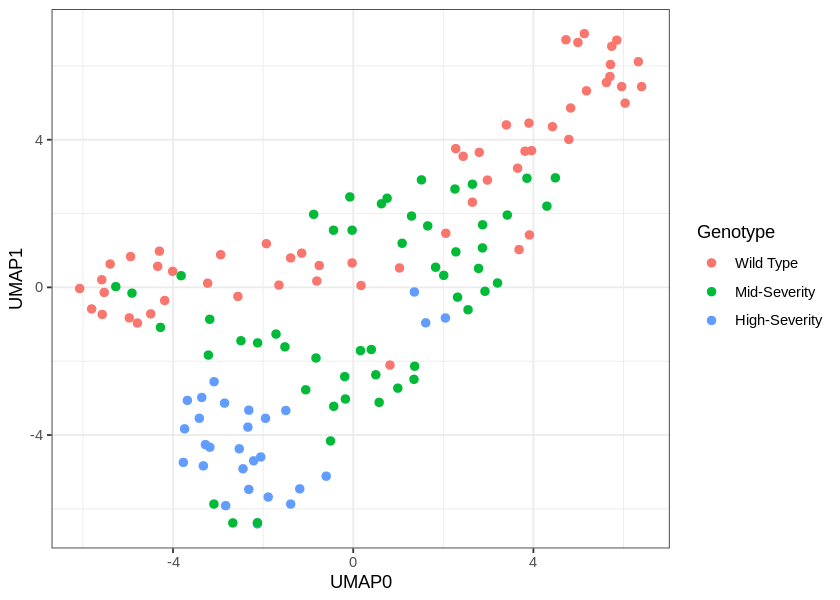

In [4]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype))
    + geom_point(size = 2)

    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



### UMAP with Identity and Genotype

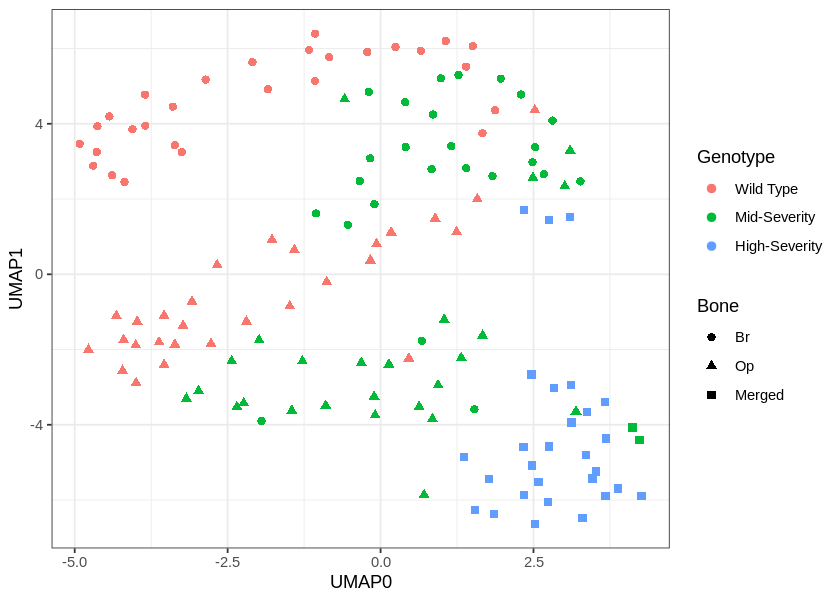

In [5]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype, shape = Metadata_identity))
    + geom_point(size = 2)

    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Bone"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype_and_bone.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



### UMAP with Side and Genotype

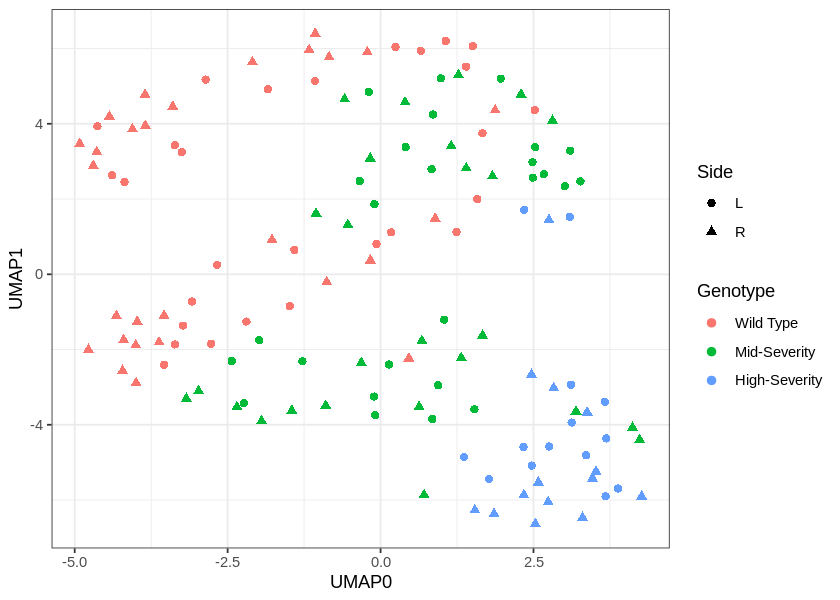

In [6]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype, shape = Metadata_side))
    + geom_point(size = 2)
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Side"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype_and_side.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



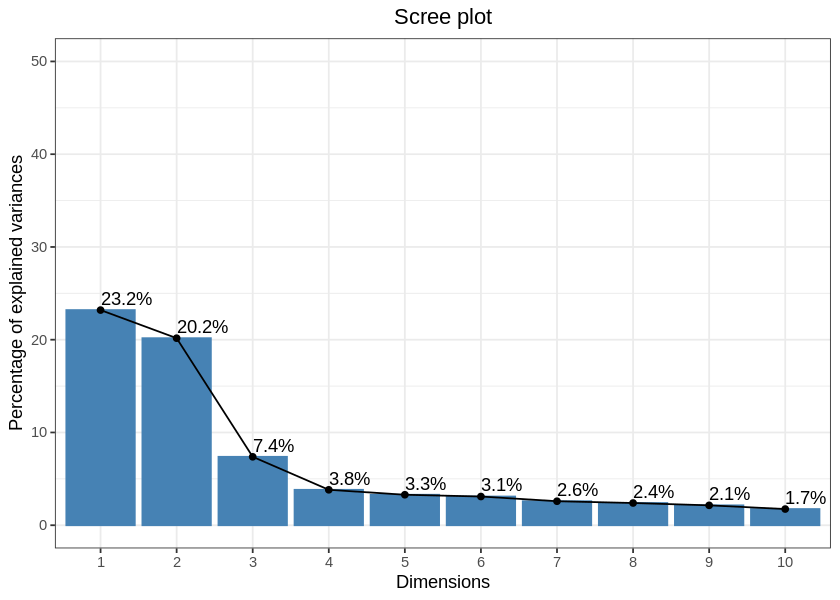

In [7]:

# Apply PCA
res.pca <- prcomp(features_df, scale = TRUE)

# Create scree plot
scree_plot <- fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))
scree_plot <- (
    scree_plot
    + theme_bw()
    # title centered
    + theme(plot.title = element_text(hjust = 0.5))
)
scree_plot
# save the plot
ggsave("scree_plot.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)

### PCA with genotype

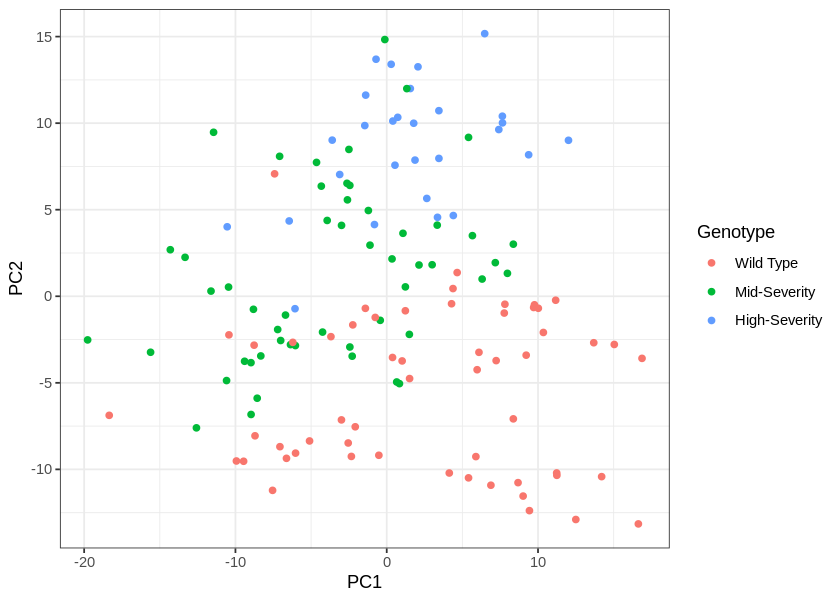

In [8]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


### PCA with Identity and Genotype

In [9]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype, shape = Metadata_identity))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Identity"))
)
# save the plot
ggsave("pca_plot_genotype_and_bone.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


### PCA with Side and Genotype

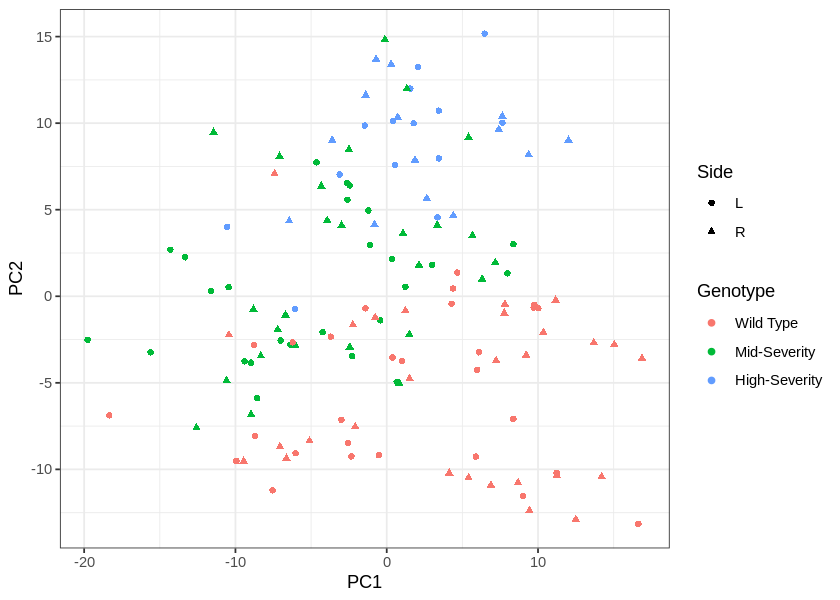

In [10]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype, shape = Metadata_side))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Side"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype_and_side.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


## PCA performed on aggregated Genotype

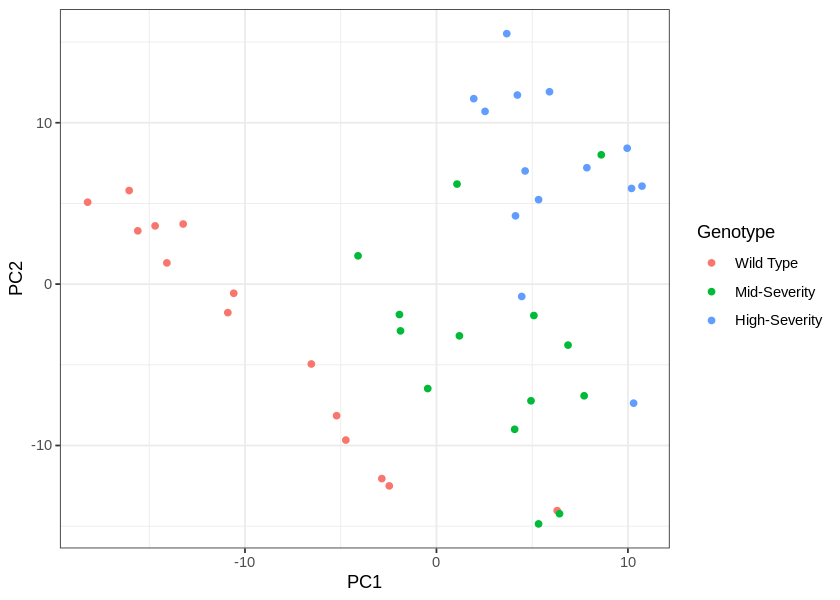

In [11]:

# remove all metadata columns 
df_selected <- df %>% select(-contains("Metadata"))
df_selected$Metadata_genotype <- df$Metadata_genotype
df_selected$Metadata_replicate <- df$Metadata_replicate
# aggregate by Metadata_genotype, FileName, Metadata_ImageNumber, side, Metdata_replicate
df_agg <- df_selected %>% 
    group_by(Metadata_genotype, Metadata_replicate) %>% 
    summarise_all(mean)
# ungroup the data
df_agg <- ungroup(df_agg)
# # generate the pca for the aggregated data
res.pca <- prcomp(df_agg %>% select(-contains("Metadata")), scale = TRUE)
# # create the pca plot
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(df_agg %>% select(contains("Metadata")), pca_df)
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype_aggregated.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


# All EDA performed on manual feature selection

In [12]:
# set path to the data
file_path <- file.path("..","..","data", "5.converted_data","normalized_manual_feature_selected_output.parquet")

# read the data
df <- arrow::read_parquet(file_path)
head(df)

AreaShape_Area,AreaShape_Compactness,AreaShape_ConvexArea,AreaShape_Eccentricity,AreaShape_EquivalentDiameter,AreaShape_FormFactor,AreaShape_HuMoment_0,AreaShape_HuMoment_1,AreaShape_HuMoment_2,AreaShape_HuMoment_3,⋯,RadialDistribution_MeanFrac_OP_3of4,RadialDistribution_MeanFrac_OP_4of4,RadialDistribution_RadialCV_OP_1of4,RadialDistribution_RadialCV_OP_2of4,RadialDistribution_RadialCV_OP_3of4,RadialDistribution_RadialCV_OP_4of4,Metadata_genotype,Metadata_side,Metadata_identity,Metadata_Fish_ID
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1.7062336,-1.0946630,1.5267377,-0.3646179,1.6040166,1.301326483,-0.8505173,-0.6439171,-0.9304764,-0.6585090,⋯,-1.0813624,1.4725468,0.721203624,1.01933662,1.4136517,1.4325833,high,L,both,10
0.7716744,-1.0749513,0.7539925,0.1690086,0.8928066,1.255925046,-0.6799504,-0.5736594,-0.9153793,-0.6244241,⋯,-1.5184304,1.6396414,1.061081351,0.23000074,0.7981232,1.3723331,high,R,both,10
2.1808575,-0.2966127,2.4086201,-2.9373126,1.9237911,-0.006871006,-0.9334970,-0.7014174,-0.9479189,-0.6551721,⋯,-0.4245064,-0.3254008,1.638487291,1.21338886,0.1522240,0.2303339,high,L,both,11
2.0815568,-1.2143221,2.0253448,-0.8354232,1.8587312,1.598488818,-0.9152581,-0.6692863,-0.9750044,-0.6667984,⋯,-1.3668256,1.7823085,-0.433300716,-0.05436085,0.9076824,1.1385302,high,R,both,11
0.6593682,-1.1889606,0.5044074,0.3919800,0.7977066,1.532220049,-0.5576464,-0.5116152,-0.7973963,-0.5535014,⋯,-1.1769029,1.3657797,0.003004767,0.40706654,1.0319502,1.0722050,high,L,both,12
1.7431080,-1.1543990,1.6862199,-0.9851928,1.6297006,1.444849359,-0.9232483,-0.6741598,-0.9345940,-0.6616366,⋯,-0.8047828,1.1799261,-0.911442753,-0.58553633,0.3651254,0.6007558,high,R,both,12


In [13]:
# split the data into metadata and features
metadata_df <- df %>% select(contains("Metadata"))
features_df <- df %>% select(-contains("Metadata"))
print(dim(metadata_df))
print(dim(features_df))

[1] 136   4
[1] 136  64


### UMAP of genotype

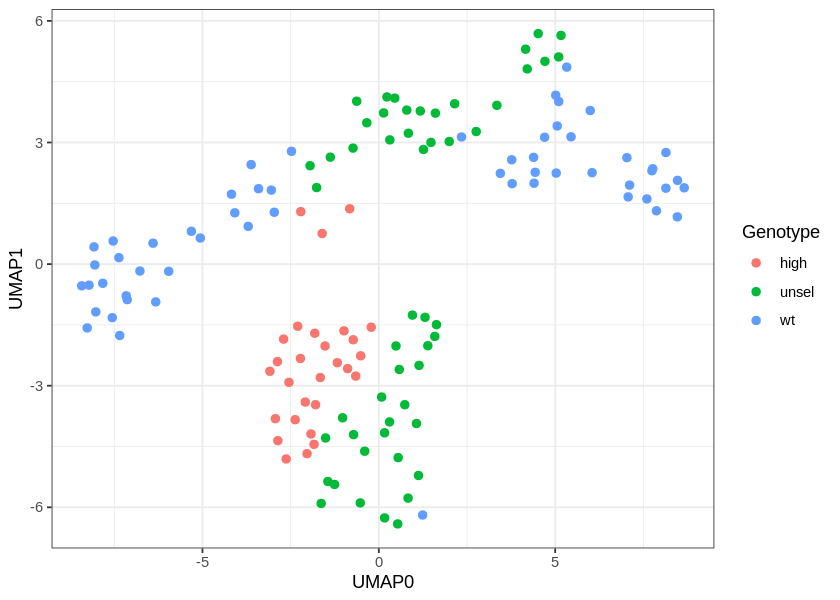

In [14]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype))
    + geom_point(size = 2)

    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



### UMAP with Identity and Genotype

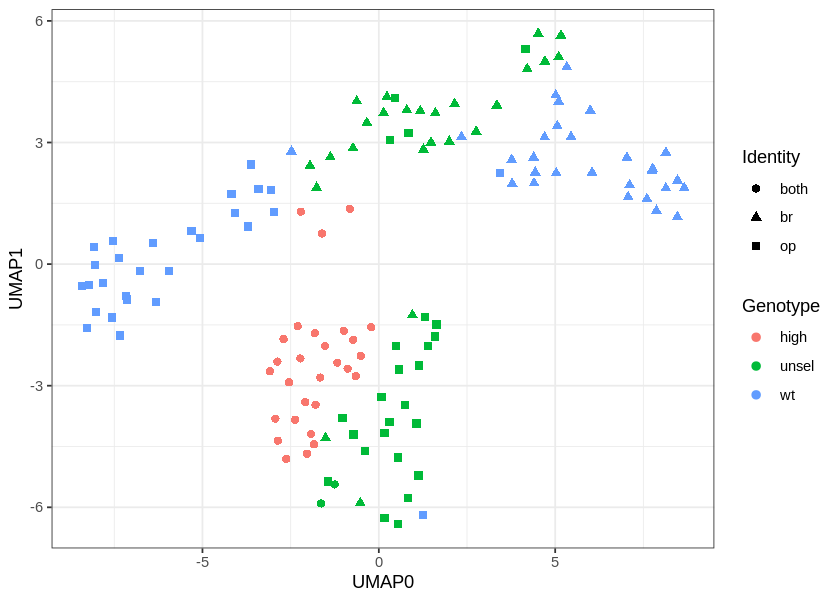

In [15]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype, shape = Metadata_identity))
    + geom_point(size = 2)

    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Identity"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype_and_bone_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



### UMAP with Side and Genotype

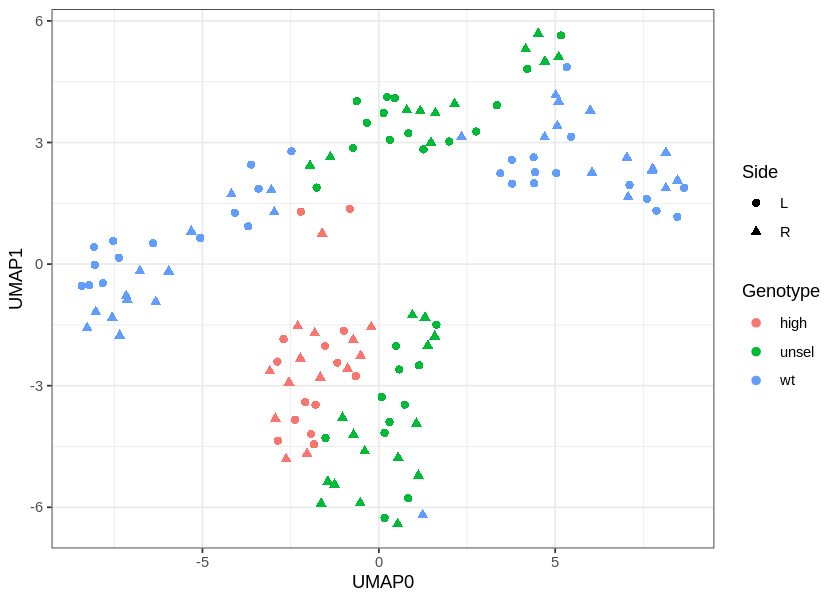

In [16]:
# umap
width <- 7
height <- 5
options(repr.plot.width = width, repr.plot.height = height)
umap_df <- umap::umap((features_df), n_neighbors = 7, min_dist = 0.7, n_components = 2, metric = "cosine")
umap_df <- as.data.frame(umap_df$layout)
colnames(umap_df) <- c("UMAP0", "UMAP1")
umap_df <- cbind(metadata_df, umap_df)

# plot umap
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP0, y = UMAP1, color = Metadata_genotype, shape = Metadata_side))
    + geom_point(size = 2)
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Side"))
)
umap_plot
# save the plot
ggsave("umap_plot_genotype_and_side_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)



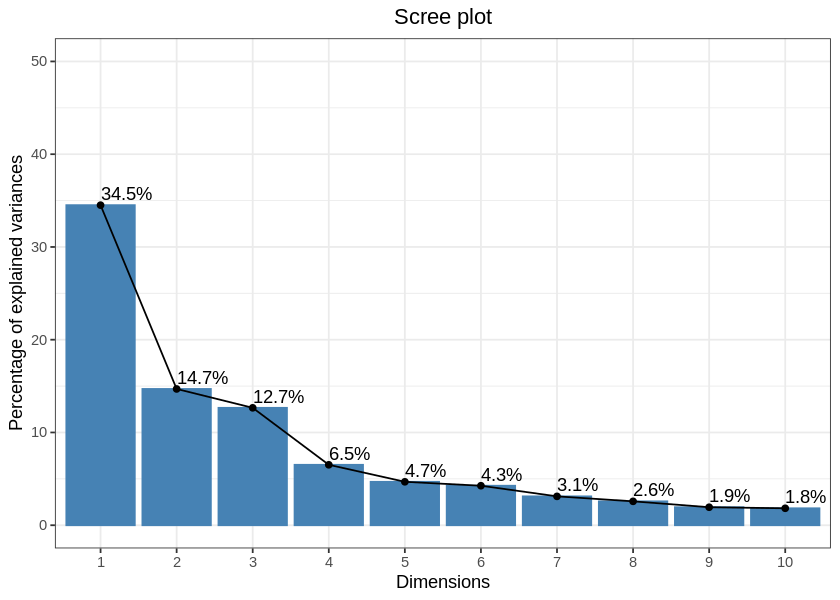

In [17]:

# Apply PCA
res.pca <- prcomp(features_df, scale = TRUE)

# Create scree plot
scree_plot <- fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))
scree_plot <- (
    scree_plot
    + theme_bw()
    # title centered
    + theme(plot.title = element_text(hjust = 0.5))
)
scree_plot
# save the plot
ggsave("scree_plot_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)

### PCA with genotype

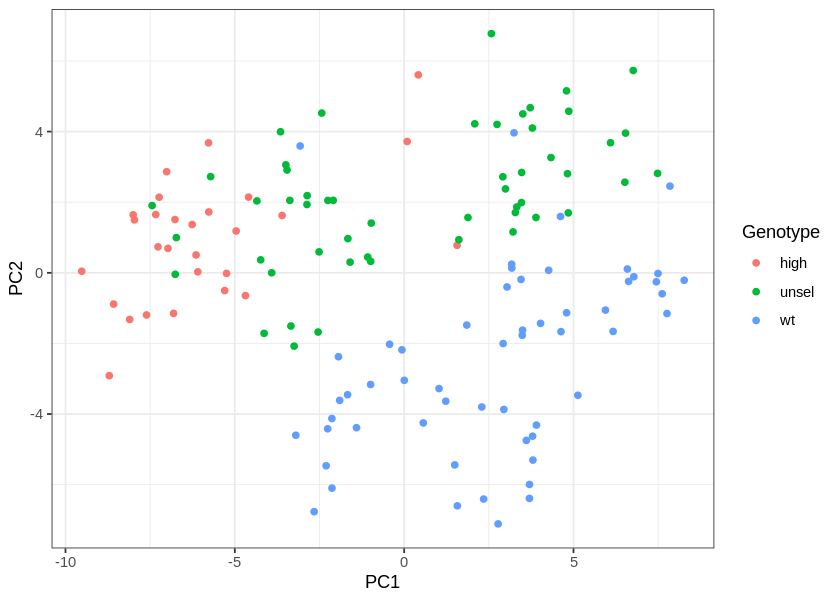

In [18]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


### PCA with Identity and Genotype

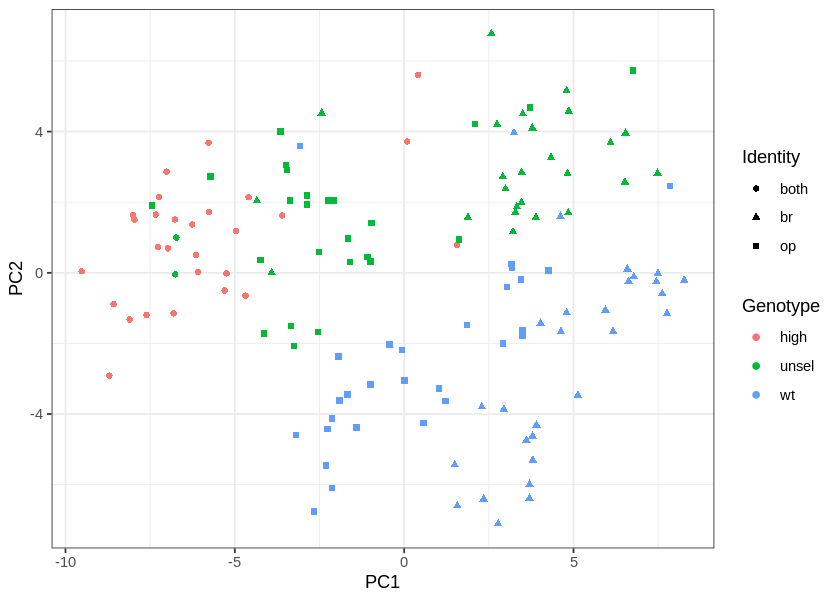

In [19]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype, shape = Metadata_identity))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Identity"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype_and_bone_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


### PCA with Side and Genotype

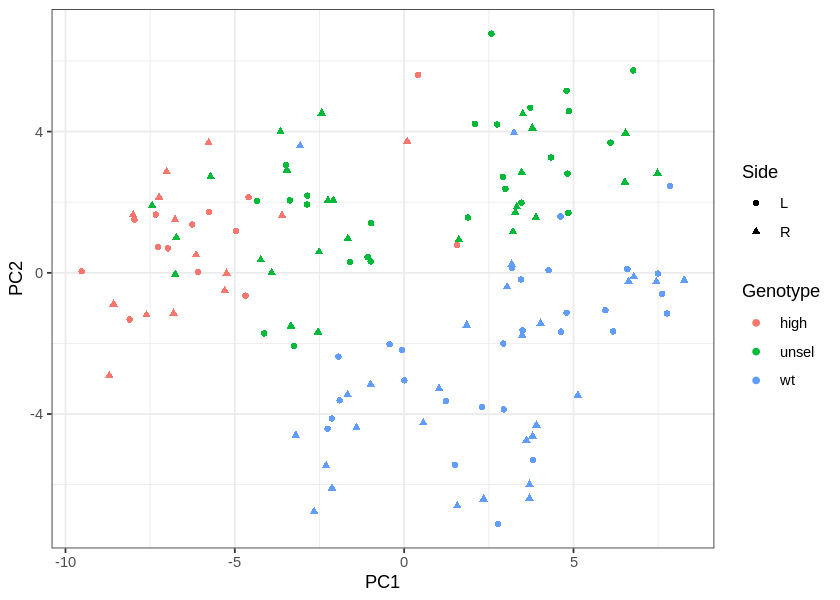

In [20]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_genotype, shape = Metadata_side))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Side"))
)
pca_plot
# save the plot
ggsave("pca_plot_genotype_and_side_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


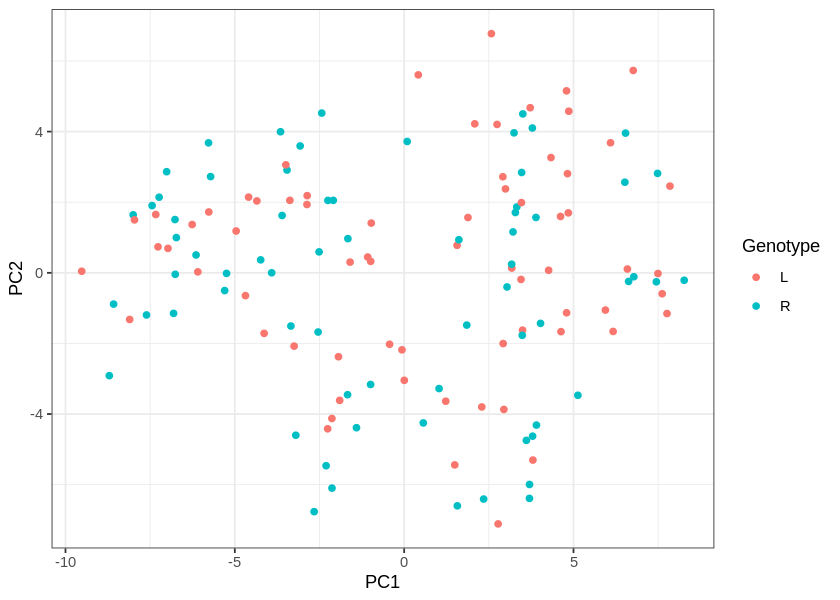

In [21]:
# pca analysis
pca_df <- as.data.frame(res.pca$x)
pca_df <- cbind(metadata_df, pca_df)

# plot pca
pca_plot <- (
    ggplot(pca_df, aes(x = PC1, y = PC2, color = Metadata_side))
    + geom_point()
    + theme_bw()
    + guides(color = guide_legend(title = "Genotype"), shape = guide_legend(title = "Side"))
)
pca_plot
# save the plot
ggsave("pca_plot_side_manual_selection.png", path = file.path("..","figures"), width = width, height = height, units = "in", dpi = 600)


In [22]:
pca_df

Metadata_genotype,Metadata_side,Metadata_identity,Metadata_Fish_ID,PC1,PC2,PC3,PC4,PC5,PC6,⋯,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high,L,both,10,-8.10504298,-1.32172976,-2.3154186,-0.88312084,-0.3430317,-0.3756111,⋯,0.0003803375,-0.017778585,-1.973204e-02,0.0081185547,-0.0018298452,0.0027482078,-3.211789e-07,-4.575543e-16,-3.902092e-16,-4.834979e-16
high,R,both,10,-5.24485069,-0.01603908,-2.6048197,-1.22878675,-1.4497382,-1.5744695,⋯,0.0230398485,-0.005763920,1.400522e-02,-0.0126590470,-0.0177605438,-0.0039404618,4.516193e-07,7.261914e-16,-1.127217e-16,-7.012986e-17
high,L,both,11,-6.97395003,0.69259166,1.2328957,1.68570884,1.4238447,4.1961762,⋯,0.0546740872,0.007306452,3.117155e-02,-0.0384360467,-0.0022504025,-0.0110943241,1.705675e-07,1.272198e-16,-1.074396e-15,6.775453e-17
high,R,both,11,-8.57911574,-0.88589335,-2.6876926,-0.37701893,-1.6936725,0.3815961,⋯,0.0069698379,0.012938510,5.077462e-02,-0.0049220952,-0.0035210341,0.0018170237,-8.464540e-08,-4.151741e-16,-5.237852e-16,-1.770184e-16
high,L,both,12,-4.68627299,-0.64665347,-1.8564011,-0.39267659,-0.1630991,-1.9897236,⋯,0.0264454095,0.007231830,1.891387e-02,0.0018694047,-0.0146067496,-0.0043580294,5.608130e-08,8.501620e-16,1.120443e-16,-1.082546e-17
high,R,both,12,-6.76635319,1.50865791,-1.9034201,0.06579042,-1.9731839,0.7058937,⋯,0.0133419284,-0.008260293,-3.441985e-03,-0.0316200342,0.0118675291,-0.0044582715,5.303797e-08,-3.849946e-16,-8.009985e-17,-1.183627e-16
high,L,both,13,-7.26815877,0.73604661,-2.4683845,0.08111459,-1.2632936,-0.3906479,⋯,-0.0026655976,0.036299673,1.776767e-02,0.0621306065,-0.0026165809,0.0043923968,-1.624916e-07,1.200638e-15,3.785581e-16,1.142459e-16
high,R,both,13,-3.60412487,1.62358507,-2.8192996,-0.13740527,-1.4081075,-2.1638943,⋯,-0.0196394267,0.011537875,-2.072768e-02,0.0110253435,0.0042666577,-0.0127793070,-4.510847e-08,1.621746e-15,1.019127e-16,1.203749e-16
high,L,both,14,-9.52105733,0.04428047,-1.1756067,0.15638581,-1.0571792,2.4279678,⋯,-0.0087733900,-0.022878906,2.342968e-02,-0.0255390422,0.0034279311,0.0103080038,1.924457e-07,-6.358887e-16,-6.612488e-16,-9.743984e-17
